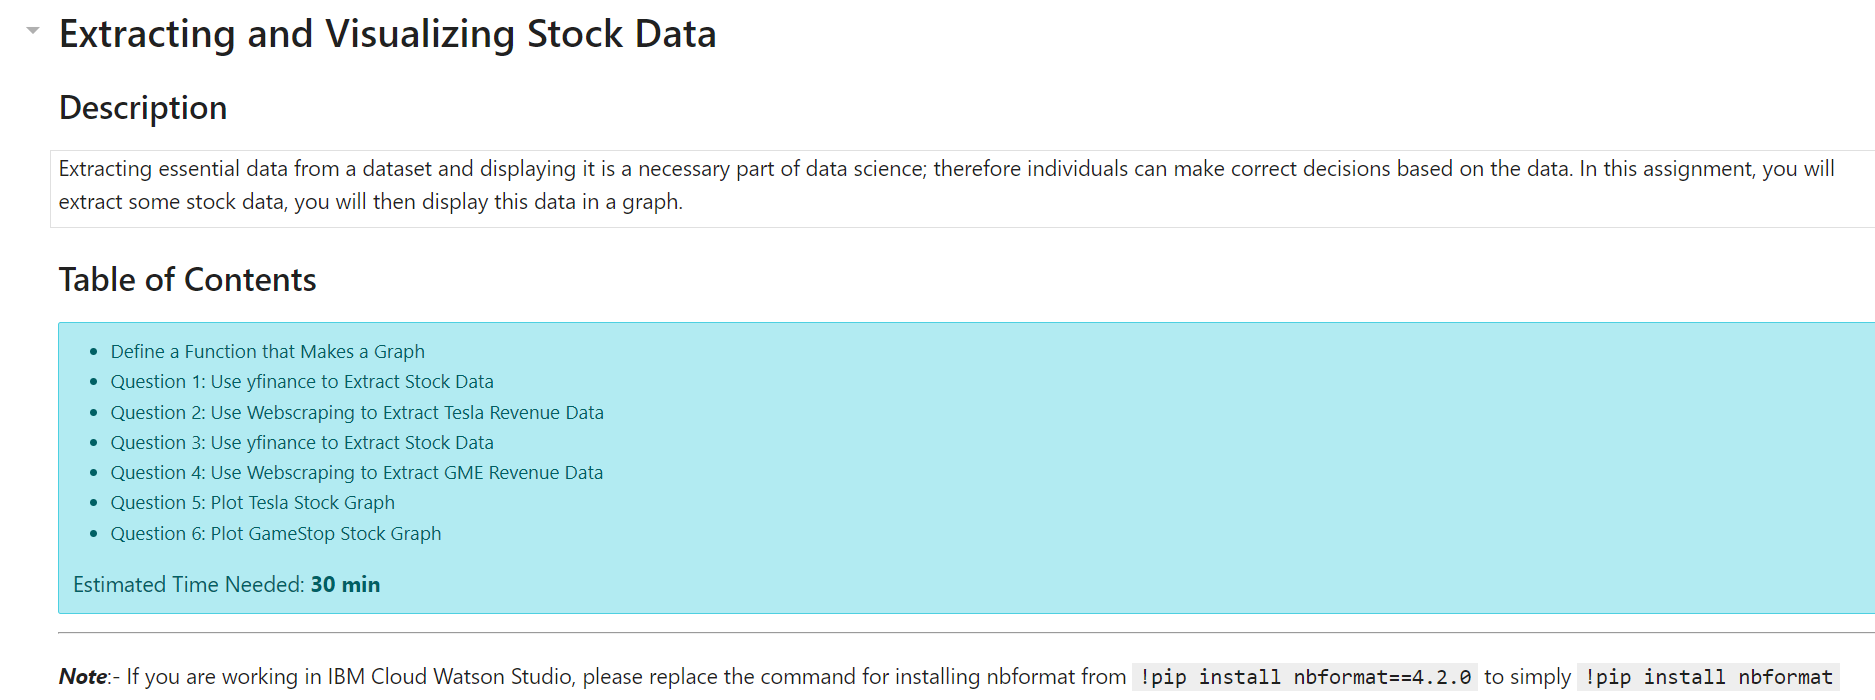

In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0 --user


'mamba' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'plotly'

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h4>Define Graphing Function</h4>
In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

<h4>Question 1: Use yfinance to Extract Stock Data</h4>
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.

In [40]:
Tesla = yf.Ticker("TSLA")

In [41]:
print(Tesla)

yfinance.Ticker object <TSLA>


In [42]:
# get stock info
Tesla.info

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}

In [43]:
# get historical market data
tesla_data = Tesla.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...
2024-04-22,140.559998,144.440002,138.800003,142.050003,107097600,0,0.0
2024-04-23,143.330002,147.259995,141.110001,144.679993,124545100,0,0.0
2024-04-24,162.839996,167.970001,157.509995,162.130005,181178000,0,0.0


The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share Open, High, Low, Close, Volume, and Stock Splits are given for each day.

In [44]:
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function

In [45]:
tesla_data_head5 = tesla_data.head(5)
tesla_data_head5.reset_index(inplace=True)
print(tesla_data_head5)

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


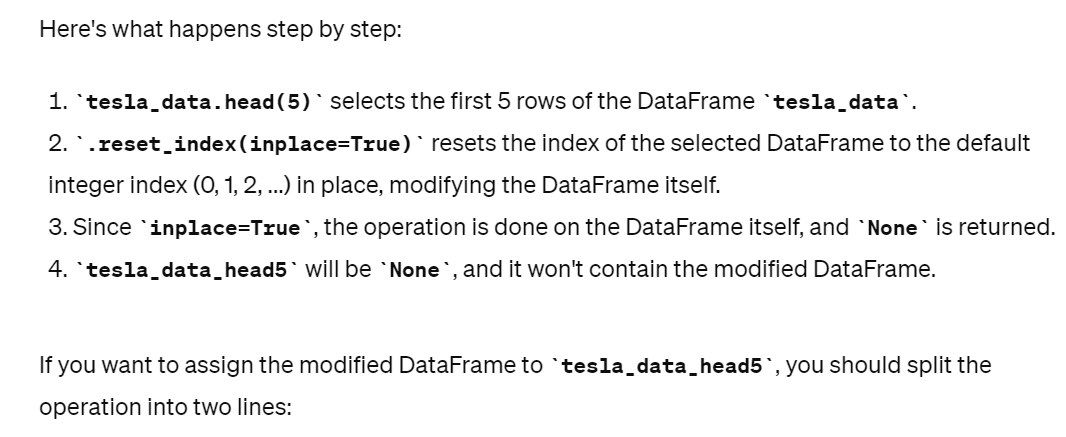

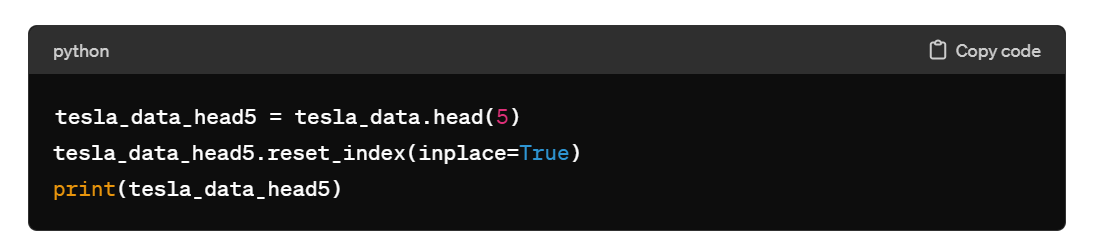

Now tesla_data_head5 will contain the modified DataFrame with the first 5 rows and the index reset.

<h4>Question 2: Use Webscraping to Extract Tesla Revenue Data </h4>
Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named html_data.

In [29]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Example HTML data (replace this with your HTML source)
html_data = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Fetch HTML content
response = requests.get(html_data)
html_content = response.text

# Parse HTML table into a DataFrame
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find_all('table')[1]  # Assuming the table is the second one in the HTML
tesla_revenue = pd.read_html(str(table), header=0)[0]

# Rename columns
tesla_revenue.columns = ["Date", "Revenue"]

# Display the DataFrame
print(tesla_revenue)


          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

Execute the following lines to remove an null or empty strings in the Revenue column.

In [30]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [31]:
# Display the DataFrame
print(tesla_revenue)

          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

Display the last 5 row of the tesla_revenue dataframe using the tail function. Take a screenshot of the results.

In [32]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


<h4>Question 3: Use yfinance to Extract Stock Data</h4>
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [9]:
GameStop = yf.Ticker("GME")

In [10]:
print(GameStop)

yfinance.Ticker object <GME>


Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to max so we get information for the maximum amount of time.

In [11]:
gme_data=GameStop.history(period="max")

Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [12]:
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [13]:
gme_data.reset_index(inplace=True)


In [14]:

print(gme_data)

           Date       Open       High        Low      Close    Volume  \
0    2002-02-13   1.620129   1.693350   1.603296   1.691667  76216000   
1    2002-02-14   1.712707   1.716074   1.670626   1.683250  11021600   
2    2002-02-15   1.683251   1.687459   1.658002   1.674834   8389600   
3    2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400   
4    2002-02-20   1.615920   1.662210   1.603296   1.662210   6892800   
...         ...        ...        ...        ...        ...       ...   
5584 2024-04-22  10.410000  10.450000  10.010000  10.010000   3261000   
5585 2024-04-23  10.050000  10.280000  10.010000  10.160000   2511800   
5586 2024-04-24  10.160000  10.940000  10.160000  10.930000   4829600   
5587 2024-04-25  10.700000  11.210000  10.480000  11.210000   4903800   
5588 2024-04-26  11.180000  12.190000  11.000000  11.900000   7626200   

      Dividends  Stock Splits  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0

In [46]:
gme_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5584,2024-04-22,10.41,10.45,10.01,10.01,3261000,0.0,0.0
5585,2024-04-23,10.05,10.28,10.01,10.16,2511800,0.0,0.0
5586,2024-04-24,10.16,10.94,10.16,10.93,4829600,0.0,0.0
5587,2024-04-25,10.70,11.21,10.48,11.21,4903800,0.0,0.0
5588,2024-04-26,11.18,12.19,11.00,11.90,7626200,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data
Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named html_data.

In [15]:
import pandas as pd
from bs4 import BeautifulSoup
import requests


In [16]:
html_data="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [17]:
# Fetch HTML content
response = requests.get(html_data)
html_content = response.text


Parse the html data using beautiful_soup.

In [18]:
soup = BeautifulSoup(html_content, 'html.parser')

Using BeautifulSoup or the read_html function extract the table with GameStop Revenue and store it into a dataframe named gme_revenue. The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column using a method similar to what you did in Question 2.

In [20]:
table = soup.find_all('table')[1]  # Assuming the table is the second one in the HTML
GameStop_revenue = pd.read_html(str(table), header=0)[0]

# Rename columns
GameStop_revenue.columns = ["Date", "Revenue"]

# Display the DataFrame
print(GameStop_revenue.columns)

Index(['Date', 'Revenue'], dtype='object')


In [21]:
GameStop_revenue.tail(5)

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


<h4>Question 5: Plot Tesla Stock Graph</h4>

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(tesla_data, tesla_revenue, 'Tesla'). Note the graph will only show data upto June 2021.

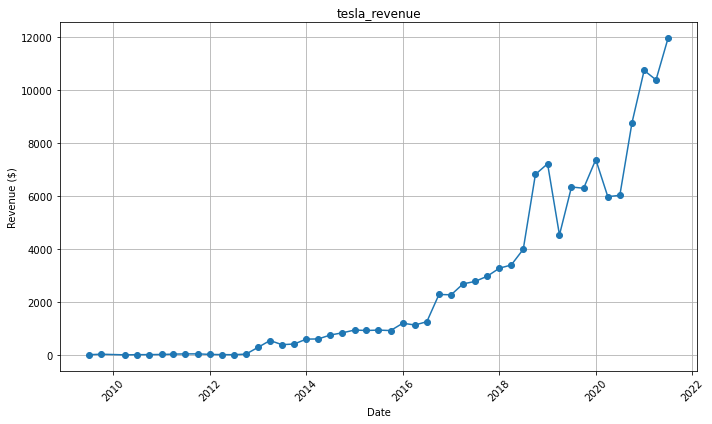

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the GameStop revenue data in a DataFrame called 'tesla_revenue'
df = pd.DataFrame(tesla_revenue)

# Convert 'Revenue' column to numeric after removing '$' and ',' characters
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date
df = df.sort_values(by='Date')

# Filter data up to June 30, 2021
tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], marker='o', linestyle='-')
plt.title('tesla_revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





<H4>Question 6: Plot GameStop Stock Graph</h4>
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop'). Note the graph will only show data upto June 2021.

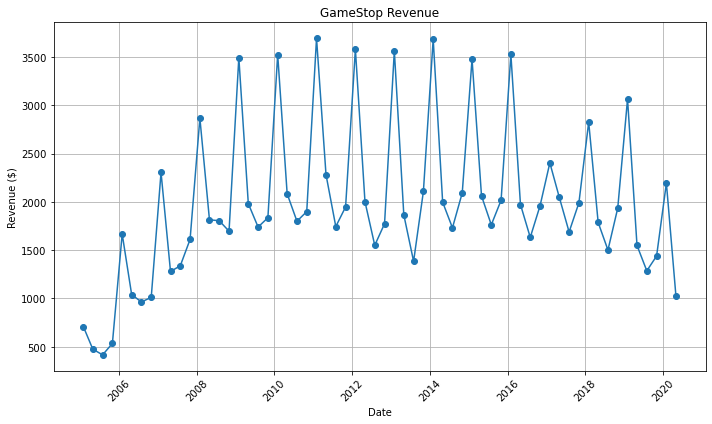

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the GameStop revenue data in a DataFrame called 'GameStop_revenue'
df = pd.DataFrame(GameStop_revenue)

# Convert 'Revenue' column to numeric after removing '$' and ',' characters
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date
df = df.sort_values(by='Date')

# Filter data up to June 30, 2021
GameStop_revenue = GameStop_revenue[GameStop_revenue['Date'] <= '2021-06-30']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(GameStop_revenue['Date'], GameStop_revenue['Revenue'], marker='o', linestyle='-')
plt.title('GameStop Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
